### Analyses of output files from the pipeline optimus v6.0.0+
#### Aim of this part of analysis is to realize the dimensionality reduction

#### Load necessary libraries and useful functions

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import scanpy as sc

from src.plot import pca_variance_ratio_plots as elbow_plots

#### Data Loading

In [5]:
input_h5ad = "../scAtlas/tmp/10k_pbmc_v3_out_feature_selection.h5ad"
adata = sc.read_h5ad(input_h5ad)

In [6]:
display(adata)

AnnData object with n_obs × n_vars = 10214 × 58347
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'scDblFinder_score', 'scDblFinder_class', 'S_score', 'G2M_score', 'phase'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'barcode_indices_for_latents', 'barcodes_analyzed', 'barcodes_analyzed_inds', 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'hvg', 'learning_curve_learning_rate_epoch', 'learning_curve

Use the shifted logarithm representation of the dataset for dimensionality reduction and visualization.

In [7]:
adata.X = adata.layers["log1p_norm"]

In [8]:
seed = 22

#### PCA

In [9]:
n_pc = 50

In [10]:
# setting highly variable as highly deviant to use scanpy 'use_highly_variable' argument in sc.pp.pca
#adata.var["highly_variable"] = adata.var["highly_deviant"] # if you computed highly deviant with scry
sc.pp.pca(adata, n_comps=n_pc, random_state=seed, use_highly_variable=True)

PC1: 25.529366731643677%
PC2: 8.684948831796646%
PC3: 3.9711683988571167%
PC4: 1.5291430056095123%
PC5: 1.4641717076301575%
PC6: 1.0103646665811539%
PC7: 0.748184509575367%
PC8: 0.538502587005496%
PC9: 0.4890859592705965%
PC10: 0.3962421789765358%
PC11: 0.36792659666389227%
PC12: 0.3311315318569541%
PC13: 0.3261577105149627%
PC14: 0.31109764240682125%
PC15: 0.25938607286661863%
PC16: 0.2506021410226822%
PC17: 0.21729618310928345%
PC18: 0.20389168057590723%
PC19: 0.1987677998840809%
PC20: 0.1770900678820908%
PC21: 0.17351025016978383%
PC22: 0.16188205918297172%
PC23: 0.15705452533438802%
PC24: 0.15141594922170043%
PC25: 0.15002901200205088%
PC26: 0.14816789189353585%
PC27: 0.14317017048597336%
PC28: 0.14128800248727202%
PC29: 0.1383181195706129%
PC30: 0.13510832795873284%
PC31: 0.13298429548740387%
PC32: 0.13184526469558477%
PC33: 0.12705752160400152%
PC34: 0.12597017921507359%
PC35: 0.1222400926053524%
PC36: 0.11937484377995133%
PC37: 0.11803071247413754%
PC38: 0.11741127818822861%
PC3

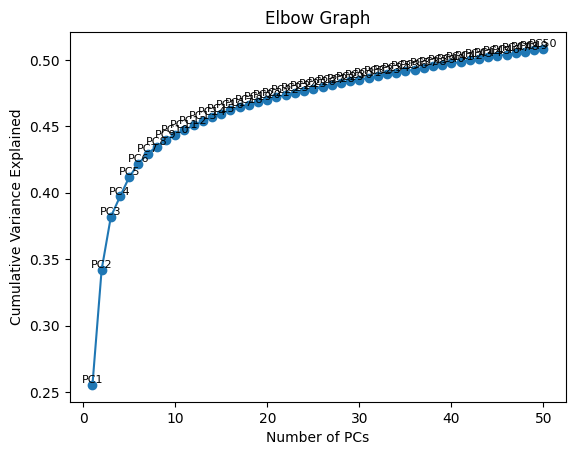

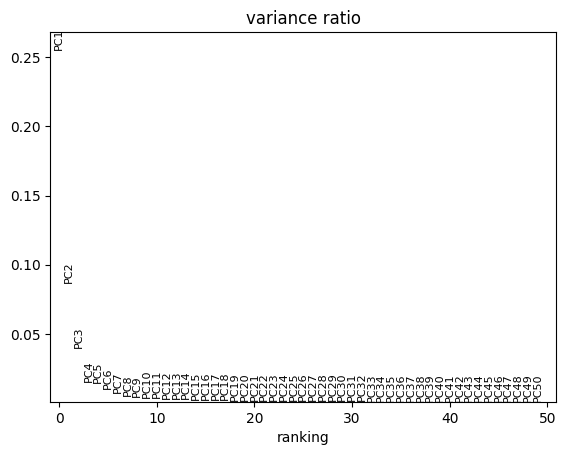

In [11]:
# elbow plot and pc variances
elbow_plots(adata, n_pc)

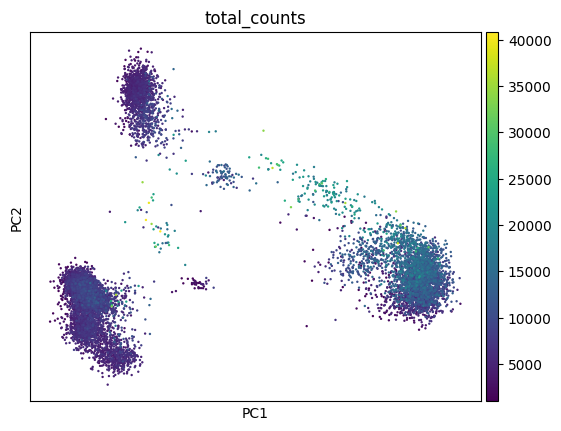

In [14]:
sc.pl.pca_scatter(adata, color="total_counts")

#### t-SNE

In [15]:
#sc.tl.tsne(adata, use_rep="X_pca")
sc.tl.tsne(adata, n_pcs=n_pc, use_rep="X_pca", random_state=seed)

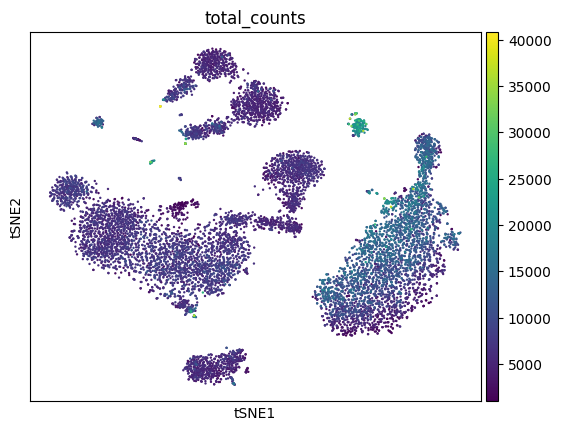

In [16]:
sc.pl.tsne(adata, color="total_counts")

#### UMAP

In [17]:
sc.pp.neighbors(adata, n_pcs=n_pc, use_rep="X_pca", random_state=seed)
sc.tl.umap(adata, neighbors_key="neighbors", random_state=seed)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


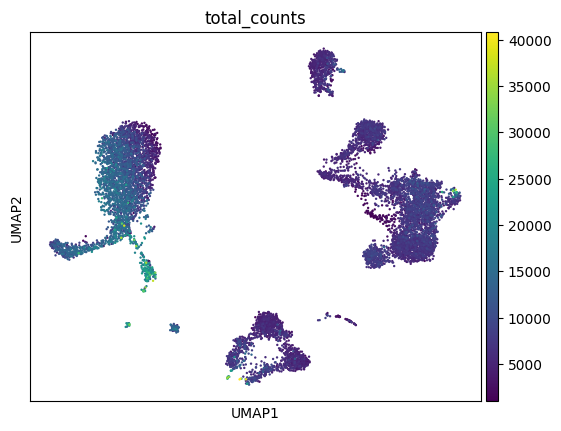

In [18]:
sc.pl.umap(adata, color="total_counts")

#### Inspecting quality control metrics

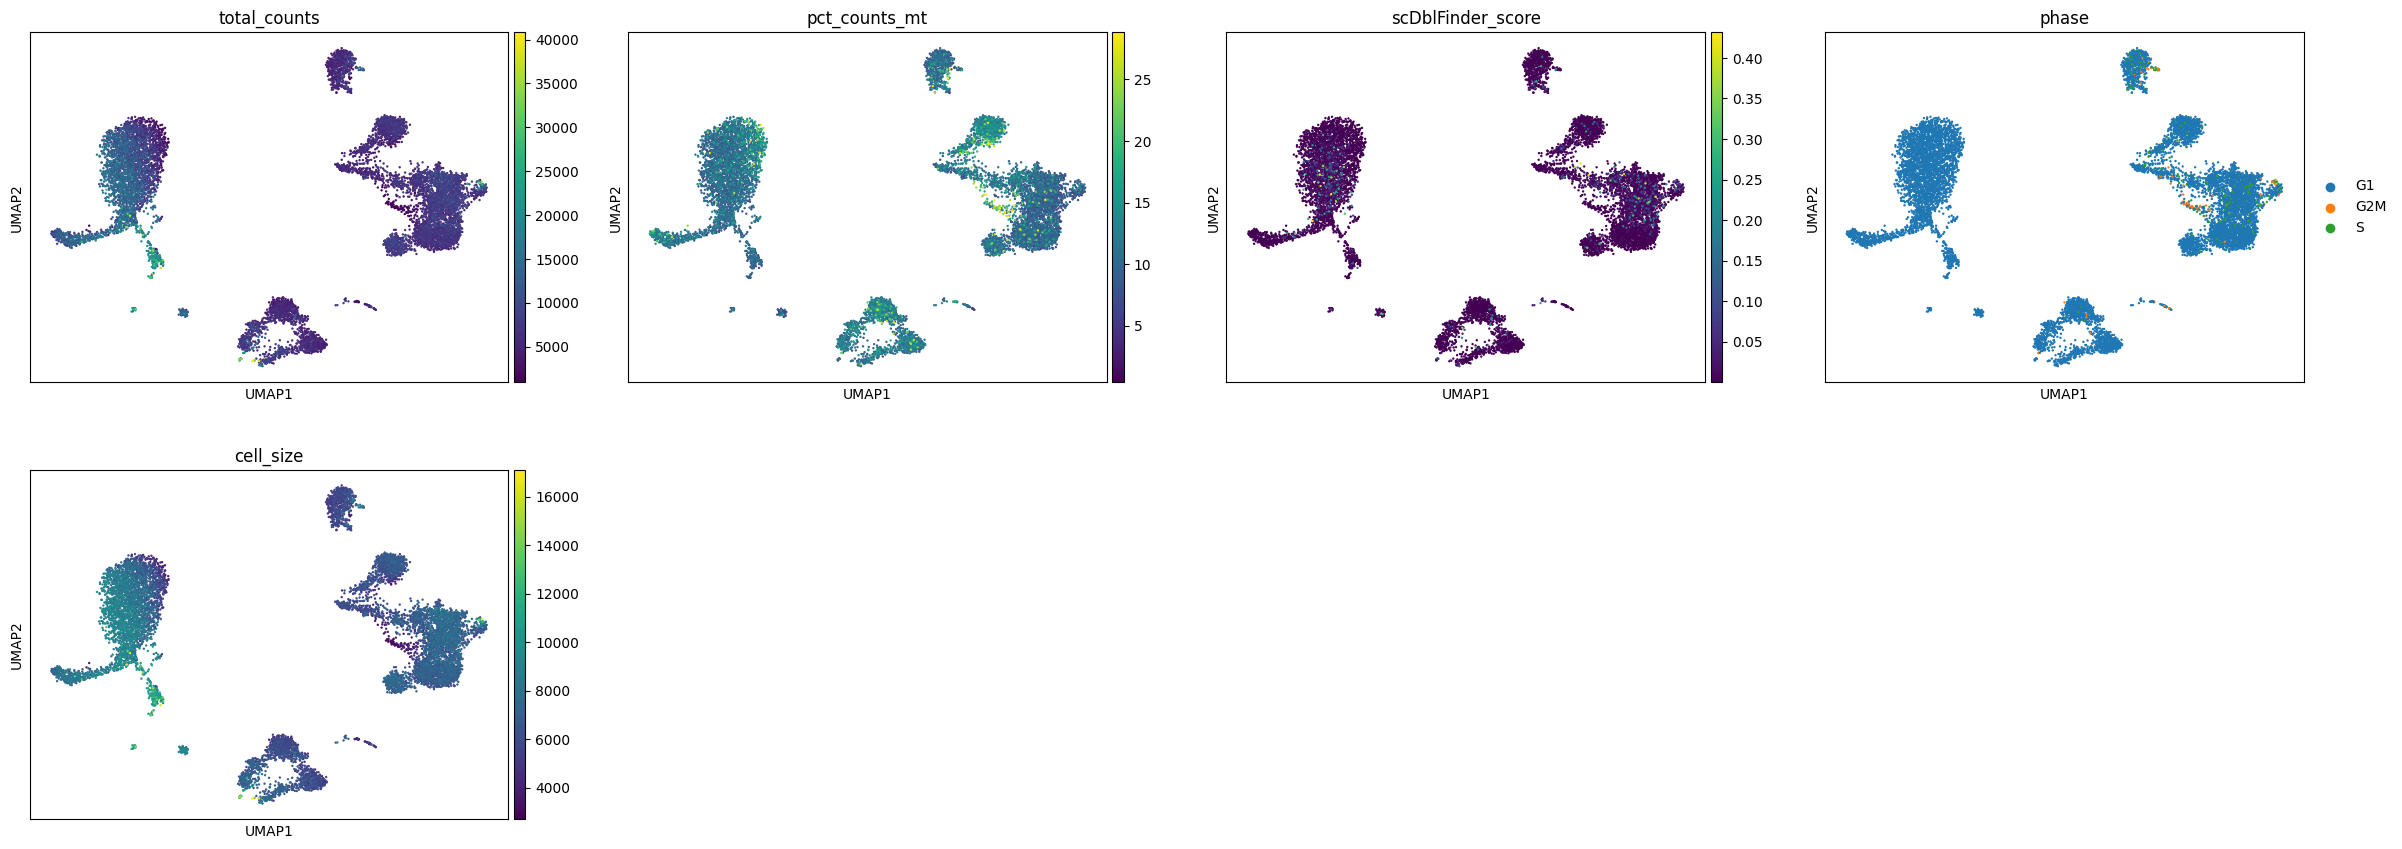

In [19]:
sc.pl.umap(
    adata,
    color=["total_counts", "pct_counts_mt", "scDblFinder_score", "phase", "cell_size"],
)
# for integrated data, check the batch effect too
# in this case, we saw that the pct_count_mt cells are lower in the cell_size and specifically to hte G2M phase

#### Write output to h5ad

In [65]:
adata.X = adata.layers["celbender_counts"]

In [66]:
PATH_TO_OUTPUT = "../scAtlas/tmp/10k_pbmc_v3_out_dim_reduction.h5ad"
adata.write_h5ad(PATH_TO_OUTPUT)